In [2]:
import pandas as pd
import numpy as np
from datetime import datetime

In [3]:
df_items = pd.read_parquet('items.parquet')
df_items['item_id'] = df_items['item_id'].astype(str)
df_review = pd.read_csv('reviews.csv')
df_review['item_id'] = df_review['item_id'].astype(str)
df_games = pd.read_csv('games.csv')
df_games['item_id'] = df_games['item_id'].astype(str)

## Análisis Exploratorio de Datos

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Estadistica descriptiva

In [ ]:
"""
Realziando el análisis de los datos que tenemos en el dataframe df_review observamos que tenemos 3 colummnas 
(user_id, user_url, item_id) con información relacionada a la identificación de los usuarios y de los videojuegos, 
también tenemos una columna relacionada con la fecha de creación del comentario por cada usuario (posted_date), también 
tenemos la columna recommend la cual muestra valores booleanos indicando si los usuarios recomiendan los juegos y finalmente
tenemos la columna creada de sentiment_analysis la cual contiene 3 diferentes valores resultado del análisis realizado a los
textos realizados por cada usuario en relación al videojuego
"""

In [5]:
# Recomendaciones negativas y positivas 
"""
Vemos que el 88% de las recomendaciones son positivas
"""
df_review_by_users = df_review.groupby(['recommend']).count()
df_review_by_users.head()

,user_id,user_url,item_id,posted_date,sentiment_analysis
recommend,,,,,
0,6832,6832,6832,5004,6832
1,52473,52473,52473,44182,52473


In [6]:
# Análisis de sentimiento
"""
Vemos que los conetarios escitos en el texto son en la mayoría comentarios neutrales o en otros idiomas dado que 
este anális se realizó considerando un solo idioma que fue el Inglés
"""
df_review_by_users = df_review.groupby(['sentiment_analysis']).count()
df_review_by_users.head()

,user_id,user_url,item_id,posted_date,recommend
sentiment_analysis,,,,,
0,5670,5670,5670,4599,5670
1,38364,38364,38364,31553,38364
2,15271,15271,15271,13034,15271


In [1]:
"""
Con relación al dataframe df_items tenemos 5.153.209 registros del tiempo que cada usuario ha dedicado a jugar deteminado
videojuego señalado en la columna playtime_forever
"""

In [17]:
df_items.head(3)

,item_id,playtime_forever,user_id
0,10,6,76561197970982479
1,20,0,76561197970982479
2,30,7,76561197970982479


[Text(0.5, 0, 'registro'), Text(0, 0.5, 'horas por jugada')]

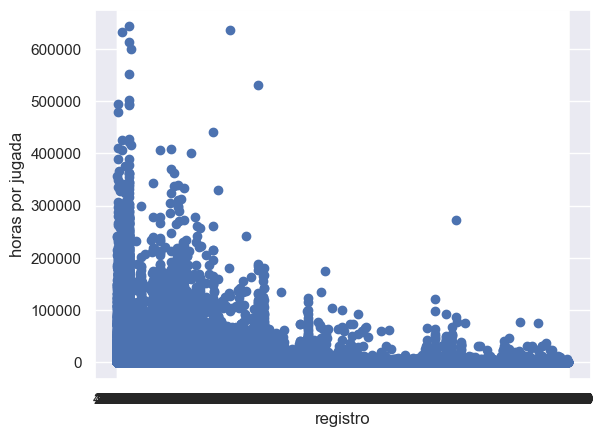

In [7]:
# Tomamos como coordenadas en x los precios
x = df_items.item_id.values
# Tomamos como coordenadas en y el puntaje de la review
y = df_items.playtime_forever.values

fig = plt.figure()
ax = plt.axes()

ax.scatter(x, y)
ax.set(xlabel='registro', ylabel='horas por jugada')

In [27]:
# Veamos cual es el videojuego que tiene mas usuarios
df_items_videoj = df_items.pivot_table(index='item_id', values='playtime_forever', aggfunc=np.sum)
df_items_videoj.sort_values('playtime_forever', ascending=False).head(5)

,playtime_forever
item_id,
730,785184267
4000,448366616
105600,154974541
72850,136678626
230410,124027703
